# PCA
### David Bazaldúa Méndez

## 1. First Steps  
Primero cargamos los datos y visualizarlos para darnos una idea de como se ven.


In [ ]:
#Load banknotes.csv
import pandas as pd
df = pd.read_csv("Banknotes.csv")
df.head()

,x1,x2,x3,x4,x5,x6
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


### 1.1 Define n and p  
In this section, we define our variables n and p to use them later in the calculations.

In [ ]:
# Define n y p from dataframe
n = len(df)
p = len(df.columns)

### 1.2 Define Matrices  
We will define the matrices that will help us later with the calculations. It is important to mention that when creating the matrix of ones with NumPy, it is already given to us in transposed format.



In [ ]:
import numpy as np

#define the matrix with the data
X = df.to_numpy()

# Create an array of ones
unos = np.ones((1, n))

# Create the identity matrix
I = np.identity(200)

### Section 1 a)  
Calculate the mean and variance using the formulas:

$$
\bar{x} = \frac{1}{n} \mathbf{1}^T X
\\
S = \frac{1}{n} X^T H X
$$



In [ ]:
#Calulate the mean
medias = (1/n) * np.dot(unos, X)
print(medias)

[[214.896  130.1215 129.9565   9.4175  10.6505 140.4835]]


In [ ]:
#Get the matrix H
H = I - (1/n) * np.dot(unos.transpose(), unos)
print(H)

[[ 0.995 -0.005 -0.005 ... -0.005 -0.005 -0.005]
 [-0.005  0.995 -0.005 ... -0.005 -0.005 -0.005]
 [-0.005 -0.005  0.995 ... -0.005 -0.005 -0.005]
 ...
 [-0.005 -0.005 -0.005 ...  0.995 -0.005 -0.005]
 [-0.005 -0.005 -0.005 ... -0.005  0.995 -0.005]
 [-0.005 -0.005 -0.005 ... -0.005 -0.005  0.995]]


In [ ]:
#Get the matric variance covariance
varianza = 1/n * np.dot((np.dot(X.transpose(),H)),X)
print(varianza)

[[ 0.141084    0.031286    0.022976   -0.10273    -0.018448    0.083884  ]
 [ 0.031286    0.12968775  0.10788525  0.21472375  0.10451425 -0.20829525]
 [ 0.022976    0.10788525  0.16245775  0.28271125  0.12934675 -0.23926775]
 [-0.10273     0.21472375  0.28271125  2.07644375  0.16371625 -1.03181125]
 [-0.018448    0.10451425  0.12934675  0.16371625  0.64149975 -0.54686675]
 [ 0.083884   -0.20829525 -0.23926775 -1.03181125 -0.54686675  1.32107775]]


1. **Mean Values**:  
   - The mean indicates the average value of each variable measured in Swiss banknotes. For example, the length of the banknote $x1$ has an average value of 214.90 units, while the heights measured on the left side $x2$ and right side $x3$ are approximately 130.12 and 129.96 units, respectively.  
   - The distances of the inner edges $x4$ and $x5$ show greater variability, with mean values of 9.42 and 10.65 units. Finally, the diagonal $x6$ has a mean of 140.48 units.

2. **Variance-Covariance Matrix**:  
   - **Most Significant Variances:**  
     - $ X_4 $ (Distance from the inner frame to the bottom edge) has the highest variance (2.0764), indicating a large dispersion in this variable.  
     - $ X_6 $ (Diagonal length) also shows high variance (1.3211), suggesting that this variable presents notable variations.

   - **Most Important Covariances:**  
     - $ \text{Cov}(X_4, X_6) = -1.0318 $: There is a strong inverse relationship between the distance to the bottom edge and the diagonal length, which could be useful for distinguishing between genuine and counterfeit banknotes.  
     - $ \text{Cov}(X_2, X_3) = 0.1079 $: The height measured on both sides of the banknote has a positive, albeit weak, relationship, as expected since they are similar measurements.

The variables $ X_4 $ and $ X_6 $ are the most dispersed and could be the most important for distinguishing between genuine and counterfeit banknotes, while the heights have more moderate relationships.



## Section 1 b)  

Calculate the eigenvalues and eigenvectors to diagonalize the variance-covariance matrix $S$ using the following relation:

$$
S = \Gamma \Lambda \Gamma^T
$$



In [ ]:
#Eigenvalue and eigenvector of the variance covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(varianza)

#Show the eigenvalues and eigenvectors
print(eigenvalues)
print(eigenvectors)

[2.98530335 0.93094242 0.24219664 0.19368545 0.08478579 0.0353371 ]
[[ 0.04377427  0.01070966  0.3263165   0.56169177  0.75257278  0.09809807]
 [-0.11216159  0.07144697  0.25896137  0.45545879 -0.34680082 -0.76651197]
 [-0.13919062  0.06628208  0.34473274  0.41532963 -0.53465173  0.63169678]
 [-0.76830499 -0.56307225  0.2180222  -0.18610822  0.09996771 -0.02221711]
 [-0.2017661   0.65928988  0.55668568 -0.45069851  0.10190229 -0.03485874]
 [ 0.57890193 -0.48854255  0.59176285 -0.25844832 -0.08445895 -0.04567946]]


#### Eigenvalues $ \Lambda $:  
The obtained eigenvalues are:

$$
\lambda = [2.9853, 0.9309, 0.2422, 0.1937, 0.0848, 0.0353]
$$

- The first eigenvalue (2.9853) is significantly larger than the others, indicating that most of the variance in the data is explained by the first principal component.  
- The following eigenvalues are smaller, meaning that each subsequent principal component explains less variance.

In general, the first two eigenvalues, $ 2.9853 $ and $ 0.9309 $, account for a considerable portion of the variability in the data, while the other four contribute much less to the total variance.

#### Eigenvectors $ \Gamma $:  
Each column of the eigenvector matrix represents a principal component, indicating the direction in which variance is maximized in the data.

- **First eigenvector**: This component explains the most variance. Its most significant coefficients correspond to the variables $ (X_4) $ (0.7683) and $ (X_6) $ (-0.5789), suggesting that the distance to the bottom edge and the diagonal length are the variables that contribute the most to the first principal component.  
- **Second eigenvector**: In this component, $ (X_4) $ and $ (X_5) $ have the highest coefficients, indicating that these variables play an important role in the second principal component.


## Section 1 c)  

1. **Calculation of Sample Principal Components:**  

The principal components are computed using the formula:

$$
Y = (X - 1_n \bar{x}^T) \Gamma
$$

2. **Scatter Plots of Principal Components:**  

To visualize the results, create scatter plots of the principal components $( Y_i )$ versus $( Y_j )$ for $( i \neq j )$, distinguishing between genuine and counterfeit banknotes. These plots will help identify which principal components best differentiate the two classes of banknotes.



In [8]:
Y = (X - unos.T @ medias) @ eigenvectors
print(Y)

[[ 0.5496481  -0.50637301  0.27586457  1.19372812 -1.17050345  0.05836252]
 [ 2.01862924 -0.66126364 -0.50199746 -0.01544486 -0.29113718  0.1458245 ]
 [ 1.83567546 -1.17530734  0.04562915 -0.18906546 -0.11268124  0.12578824]
 ...
 [-1.36506781 -0.09215055  0.38971131 -0.08612651 -0.16641618  0.114063  ]
 [-2.29848688 -0.01691873  0.42998149  0.20435389 -0.47340826  0.06091866]
 [-1.27744022  0.52513666 -0.1506376  -0.75927751 -0.10209897  0.0689855 ]]


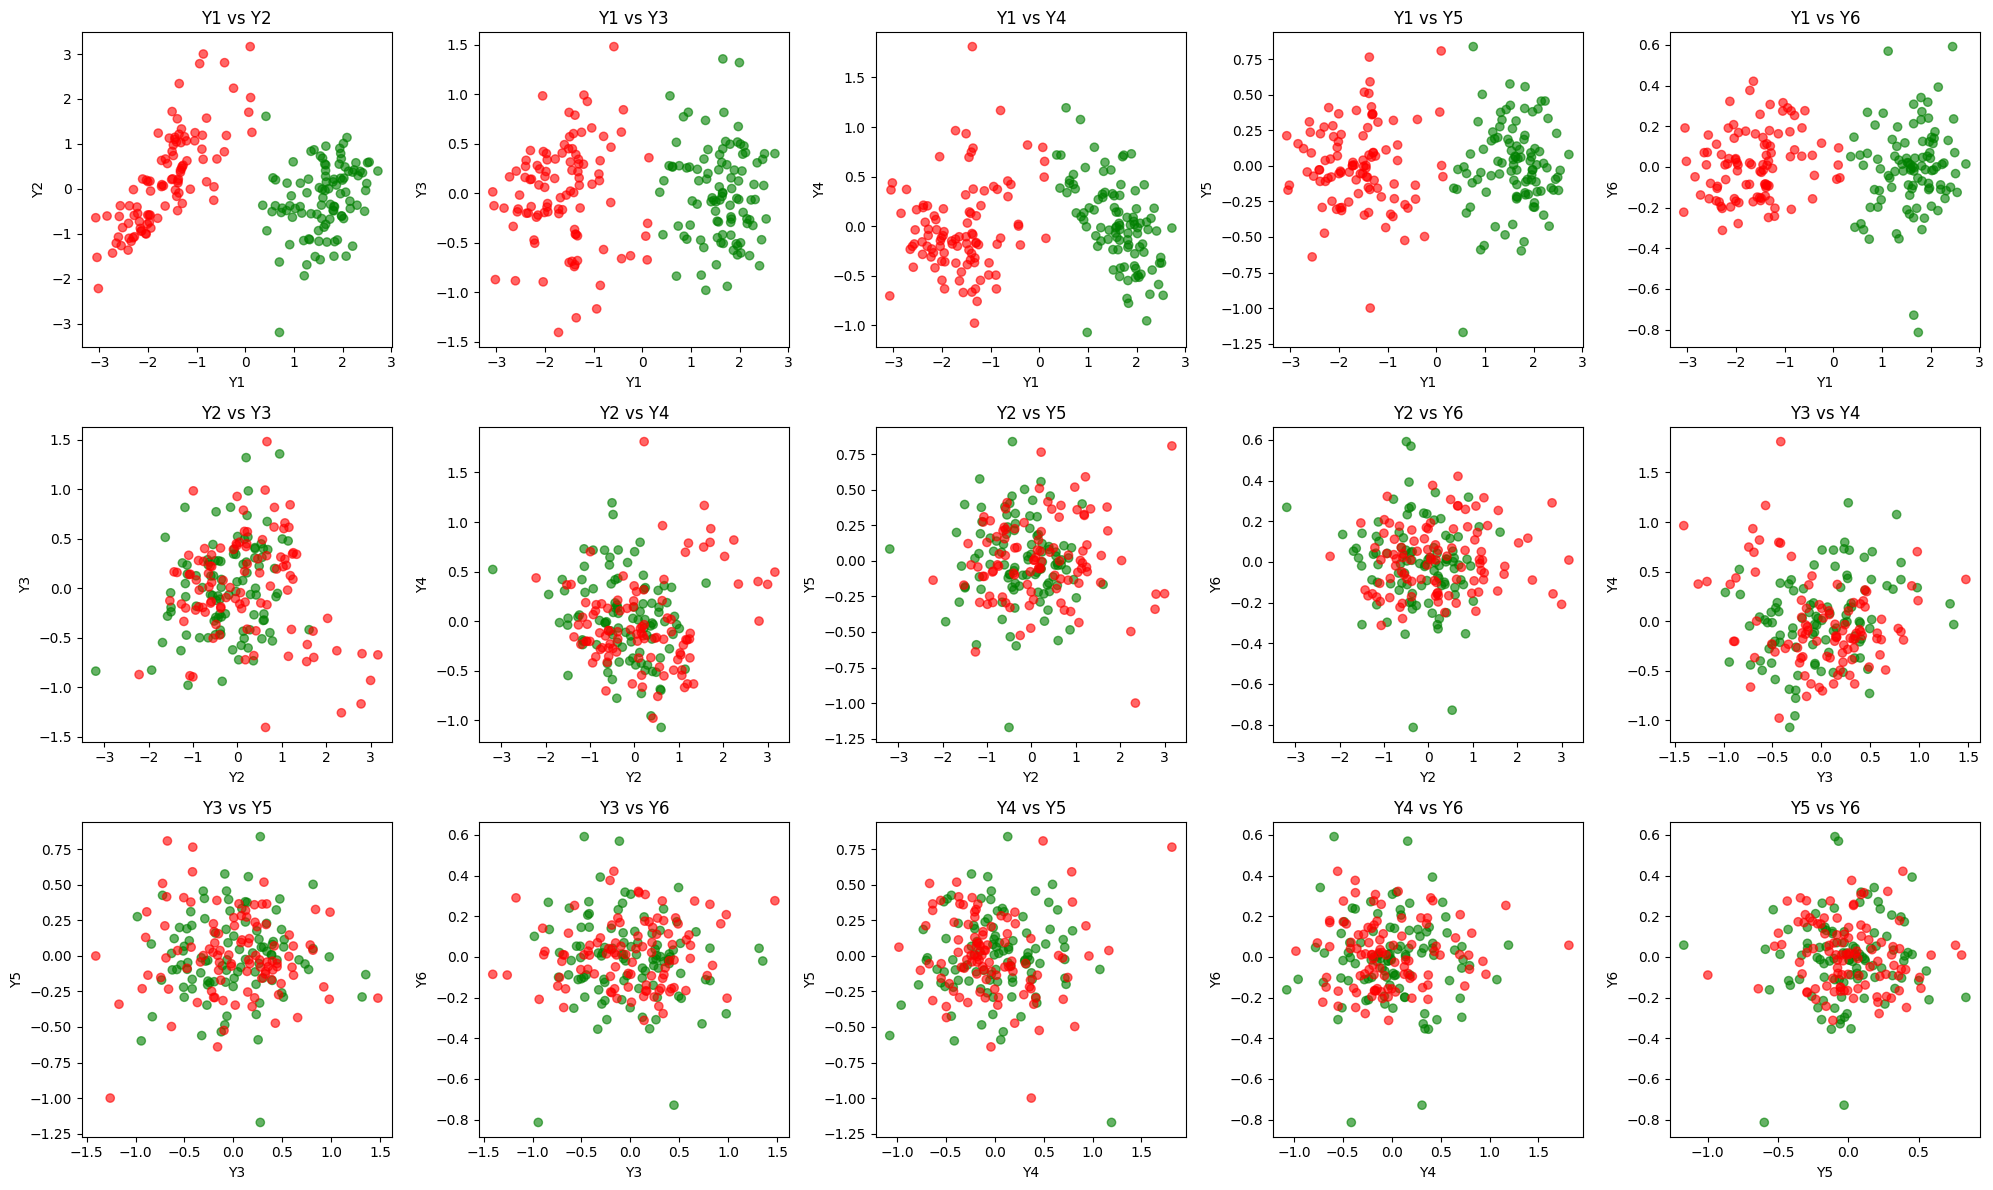

In [ ]:
import matplotlib.pyplot as plt

#Create the subplot
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

#Create the name to name the graphics easier
pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5),
         (1, 2), (1, 3), (1, 4), (1, 5),
         (2, 3), (2, 4), (2, 5),
         (3, 4), (3, 5),
         (4, 5)]

#Colors fake red and true green
labels = np.array([0]*100 + [1]*100)
colors = ['green' if label == 0 else 'red' for label in labels]

for i, (comp_x, comp_y) in enumerate(pairs):
    row, col = divmod(i, 5)
    axes[row, col].scatter(Y[:, comp_x], Y[:, comp_y], c=colors, alpha=0.6)
    axes[row, col].set_xlabel(f'Y{comp_x+1}')
    axes[row, col].set_ylabel(f'Y{comp_y+1}')
    axes[row, col].set_title(f'Y{comp_x+1} vs Y{comp_y+1}')


for i in range(len(pairs), 15):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

Each plot shows the relationship between two principal components, distinguishing between genuine banknotes (green) and counterfeit banknotes (red). The principal components are linear combinations of the original variables that capture most of the variance in the data. Below are some key points in interpreting these plots:

1. **Y1 vs Other Components (Y2, Y3, Y4, Y5, Y6)**:  
   - The **Y1 vs Y2** plot shows a clear separation between genuine and counterfeit banknotes, suggesting that the first two principal components explain most of the variance related to differences between the two types of banknotes.  
   - In general, **Y1** appears to have a strong ability to differentiate between genuine and counterfeit banknotes in most plots where it appears, especially with **Y2** and **Y3**.

2. **Y2 vs Other Components**:  
   - **Y2 vs Y3** and **Y2 vs Y4** also show a clear separation between the two groups of banknotes. This indicates that these components capture a significant portion of the variance that enables differentiation.  
   - However, when comparing **Y2 vs Y5** and **Y2 vs Y6**, there is less clear separation between genuine and counterfeit banknotes, suggesting that components **Y5** and **Y6** are not as important for differentiation.

3. **Y3, Y4, Y5, and Y6**:  
   - The plots **Y3 vs Y5**, **Y4 vs Y5**, and **Y5 vs Y6** show little to no clear separation between genuine and counterfeit banknotes. This indicates that components **Y5** and **Y6** do not capture significant variance related to differences between the two groups.  
   - **Y3 vs Y4** still shows some differentiation between the two groups, suggesting that **Y3** and **Y4** have moderate relevance in the separation.


## Section 1 d)  

Calculate the percentage contributions of each principal component and their cumulative values. In a variance reduction problem, how many (and which) principal components would you choose?

In [ ]:
#Calculate the percentual contribution
varianza_total = np.sum(eigenvalues)
aporte_porcentual = (eigenvalues / varianza_total) * 100

#Sum of the percentual contribution
aporte_cum = np.cumsum(aporte_porcentual)

print("This is the percentual contribution:", aporte_porcentual)
print("This is the summed contribution:", aporte_cum)

Este es el aporte percentual vertical: [66.75169872 20.81597102  5.41554245  4.33082717  1.89581928  0.79014136]
Este es el aporte acumulado: [ 66.75169872  87.56766974  92.98321219  97.31403936  99.20985864
 100.        ]


1. **Percentage Contributions**:  
   - **Y1**: Explains **66.75%** of the total variance, making it the most important principal component.  
   - **Y2**: Contributes **20.82%** of the variance. Together, the first two components explain a large portion of the variability in the data, exceeding the **80%** threshold often sought.  
   - **Y3**: Accounts for **5.42%**, meaning the additional information captured by this component is much smaller compared to the first two.  
   - The components **Y4**, **Y5**, and **Y6** each explain less than **5%** of the variance, making them less relevant.

2. **Cumulative Contributions**:  
   - The first two components (**Y1** and **Y2**) explain **87.57%** of the total variance, suggesting that almost all data variability can be captured with just these two components.  
   - Including the third component (**Y3**) increases the explained variance to **92.98%**, which is sufficient to capture most of the information in the data.  
   - The remaining components (**Y4, Y5, and Y6**) contribute very little additional variance.

Since the first two principal components explain a significant portion of the variance (**87.57%**), it is recommended to use only these two to reduce the dimensionality of the data without losing much information. If capturing more than **90%** of the variance is desired, the third component (**Y3**) could be included, bringing the total explained variance to **92.98%**. The components **Y4**, **Y5**, and **Y6** do not provide enough additional information and can be discarded.


## Section 1 e)  

Prove that for the PCA scheme, the covariance between $ X $ and $ Y $ is given by:

$$
\text{Cov}(X, Y) = \Gamma \Lambda
$$

And consequently, the correlation between $ X_i $ and $ Y_j $ is given by:

$$
\rho_{X_i Y_j} = \gamma_{ij} \left( \frac{\lambda_i}{\sigma_{ii}} \right)^{1/2}
$$

Additionally, prove that:

$$
(\rho_{X_i Y_j})^2
$$

represents the proportion of the variance of $ X_i $ explained by $ Y_j $.


### Proof  

#### Step 1: Relationship Between the Covariance of $ X $ and $ Y $  

We know that the principal components $ Y $ are related to the original data $ X $ as follows:

$$
Y = X \Gamma
$$

where:
- $ X $ is the mean-centered data matrix,  
- $ \Gamma $ is the matrix of eigenvectors.

Now, the covariance between $ X $ and $ Y $ is given by:

$$
\text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])^T]
$$

Since $ Y = X \Gamma $, we substitute:

$$
\text{Cov}(X, Y) = \mathbb{E}[(X - \mathbb{E}[X])(X \Gamma)^T]
$$

Since the data $ X $ is centered (i.e., $ \mathbb{E}[X] = 0 $), this simplifies to:

$$
\text{Cov}(X, Y) = \mathbb{E}[X (X \Gamma)^T] = \text{Cov}(X, X) \Gamma
$$

The covariance of $ X $ with itself is the variance-covariance matrix $ S $, which can be decomposed as:

$$
S = \Gamma \Lambda \Gamma^T
$$

where:
- $ \Lambda $ is the diagonal matrix of eigenvalues.

Thus, the covariance between $ X $ and $ Y $ is:

$$
\text{Cov}(X, Y) = \Gamma \Lambda
$$

#### Step 2: Relationship Between the Correlation of $ X_i $ and $ Y_j $  

The correlation between $ X_i $ and $ Y_j $ is defined as:

$$
\rho_{X_i Y_j} = \frac{\text{Cov}(X_i, Y_j)}{\sqrt{\text{Var}(X_i) \text{Var}(Y_j)}}
$$

Since:

$$
\text{Cov}(X_i, Y_j) = \gamma_{ij} \lambda_j
$$

and:

- $ \text{Var}(X_i) = \sigma_{ii} $ (the variance of variable $ X_i $),  
- $ \text{Var}(Y_j) = \lambda_j $ (the eigenvalue associated with principal component $ Y_j $),

substituting these values into the correlation formula:

$$
\rho_{X_i Y_j} = \frac{\gamma_{ij} \lambda_j}{\sqrt{\sigma_{ii} \lambda_j}} = \gamma_{ij} \left( \frac{\lambda_j}{\sigma_{ii}} \right)^{1/2}
$$

#### Step 3: Proportion of Variance Explained  

The term $ (\rho_{X_i Y_j})^2 $ represents the proportion of the variance of $ X_i $ explained by principal component $ Y_j $. Given that:

$$
(\rho_{X_i Y_j})^2 = \left( \gamma_{ij} \left( \frac{\lambda_j}{\sigma_{ii}} \right)^{1/2} \right)^2
$$

then:

$$
(\rho_{X_i Y_j})^2 = \gamma_{ij}^2 \frac{\lambda_j}{\sigma_{ii}}
$$

This demonstrates that $ (\rho_{X_i Y_j})^2 $ represents the fraction of the variance of $ X_i $ explained by principal component $ Y_j $.


## Section 1 f)  

Using the data, compute the corresponding correlations and plot $( r_{X_i Y_1} )$ vs $( r_{X_i Y_2} )$ vs $( r_{X_i Y_3} )$ within the unit circle.


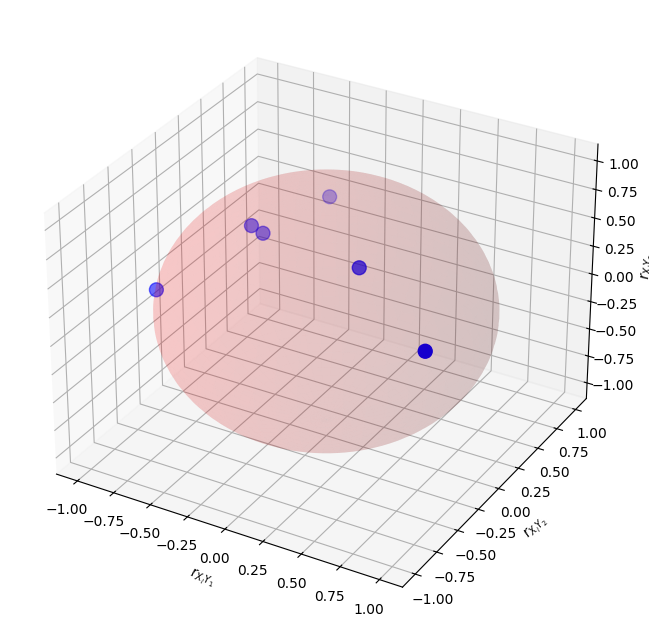

[[ 0.2013605   0.02751049  0.42754733]
 [-0.5381321   0.19142371  0.35389103]
 [-0.59666972  0.15866725  0.42091691]
 [-0.92122942 -0.37702092  0.07446028]
 [-0.43525543  0.79421772  0.34205493]
 [ 0.87023199 -0.4101093   0.25337722]]


In [ ]:
# Variance (σ_ii) for each original X_i (diagonal of the variance-covariance matrix)
variances_X = np.diag(varianza)

# Eigenvalues for the first 3
lambda_1_2_3 = eigenvalues[:3]

# Eigenvectors for the first 3
gamma_1_2_3 = eigenvectors[:, :3]


# Calculate the correlations
correlations = np.zeros_like(gamma_1_2_3)

for i in range(gamma_1_2_3.shape[0]):
    for j in range(3):
        correlations[i, j] = gamma_1_2_3[i, j] * np.sqrt(lambda_1_2_3[j] / variances_X[i])

# Step 2: Plot the 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

# Plot 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# X, Y, Z corresponde a r_{X_i Y_1}, r_{X_i Y_2}, r_{X_i Y_3}
ax.scatter(correlations[:, 0], correlations[:, 1], correlations[:, 2], color='b', s=100)


ax.set_xlabel('$r_{X_i Y_1}$')
ax.set_ylabel('$r_{X_i Y_2}$')
ax.set_zlabel('$r_{X_i Y_3}$')

#Ploteamos una esfera unitaria
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.1)

plt.show()

print(correlations)

The obtained correlation matrix shows how each of the original variables $ X_i $ correlates with the first three principal components $ Y_1 $, $ Y_2 $, and $ Y_3 $. These results are key to understanding how well each principal component captures the information from the original variables.

1. **$( X_4 )$ and $( Y_1 )$**: The variable $( X_4 )$ (distance from the bottom frame) has a strong positive correlation with the first principal component $( Y_1 )$ (0.9212). This indicates that the first principal component effectively captures the variability of this variable.

2. **$( X_6 )$ and $( Y_1 )$**: The diagonal length $( X_6 )$ has a strong negative correlation with $( Y_1 )$ (-0.8702), suggesting that the first principal component is also heavily influenced by this variable, but in the opposite direction.

3. **$( X_2 )$ and $( Y_1 )$**: The height measured on the left side $( X_2 )$ has a moderate positive correlation with $( Y_1 )$ (0.5381), indicating that the first component also captures some of the variability of this variable.

4. **$( X_5 )$ and $( Y_2 )$**: The distance to the upper edge $( X_5 )$ has a strong negative correlation with the second principal component $( Y_2 )$ (-0.7942). This indicates that $( Y_2 )$ is strongly influenced by this variable.

5. **$( X_1 )$ and the components**: The banknote length $( X_1 )$ does not show particularly strong correlations with any of the first three principal components, suggesting that it is less represented in these components.

6. **$( X_3 )$ and the components**: The height measured on the right side $( X_3 )$ shows moderate correlations with $( Y_1 )$ (0.5967) and $( Y_2 )$ (-0.1587), indicating that part of its variability is captured by these components.

The principal components $ Y_1 $ and $ Y_2 $ capture most of the variability of the variables $ X_4 $ (distance from the bottom frame), $ X_6 $ (diagonal length), and $ X_5 $ (distance from the upper frame). This suggests that these variables are the most important for describing the structure of the data. The variables $ X_1 $ and $ X_3 $, although less influential, are also represented to a lesser extent.


## Section 2  

Now, convert the features $( X_1 )$, $( X_2 )$, $( X_3 )$, and $( X_6 )$ to centimeters and perform items (1)(a-d). Carefully review the differences from the previous section and conclude why they occur.

Medias:
 [[21.4896  13.01215 12.99565  9.4175  10.6505  14.04835]]
Matriz de varianza: [[ 1.41084000e-03  3.12860000e-04  2.29760000e-04 -1.02730000e-02
  -1.84480000e-03  8.38840000e-04]
 [ 3.12860000e-04  1.29687750e-03  1.07885250e-03  2.14723750e-02
   1.04514250e-02 -2.08295250e-03]
 [ 2.29760000e-04  1.07885250e-03  1.62457750e-03  2.82711250e-02
   1.29346750e-02 -2.39267750e-03]
 [-1.02730000e-02  2.14723750e-02  2.82711250e-02  2.07644375e+00
   1.63716250e-01 -1.03181125e-01]
 [-1.84480000e-03  1.04514250e-02  1.29346750e-02  1.63716250e-01
   6.41499750e-01 -5.46866750e-02]
 [ 8.38840000e-04 -2.08295250e-03 -2.39267750e-03 -1.03181125e-01
  -5.46866750e-02  1.32107775e-02]]
Valores propios: [2.10125862e+00 6.26260639e-01 4.66366188e-03 2.08876626e-03
 8.60987547e-04 3.53901192e-04]
Vectores propios: [[ 0.00497046  0.00107751 -0.05418413 -0.63246848  0.76618635 -0.09990154]
 [-0.01076604 -0.01279284  0.1003698  -0.53519984 -0.33433467  0.76904343]
 [-0.0141202  -0.01549116  0

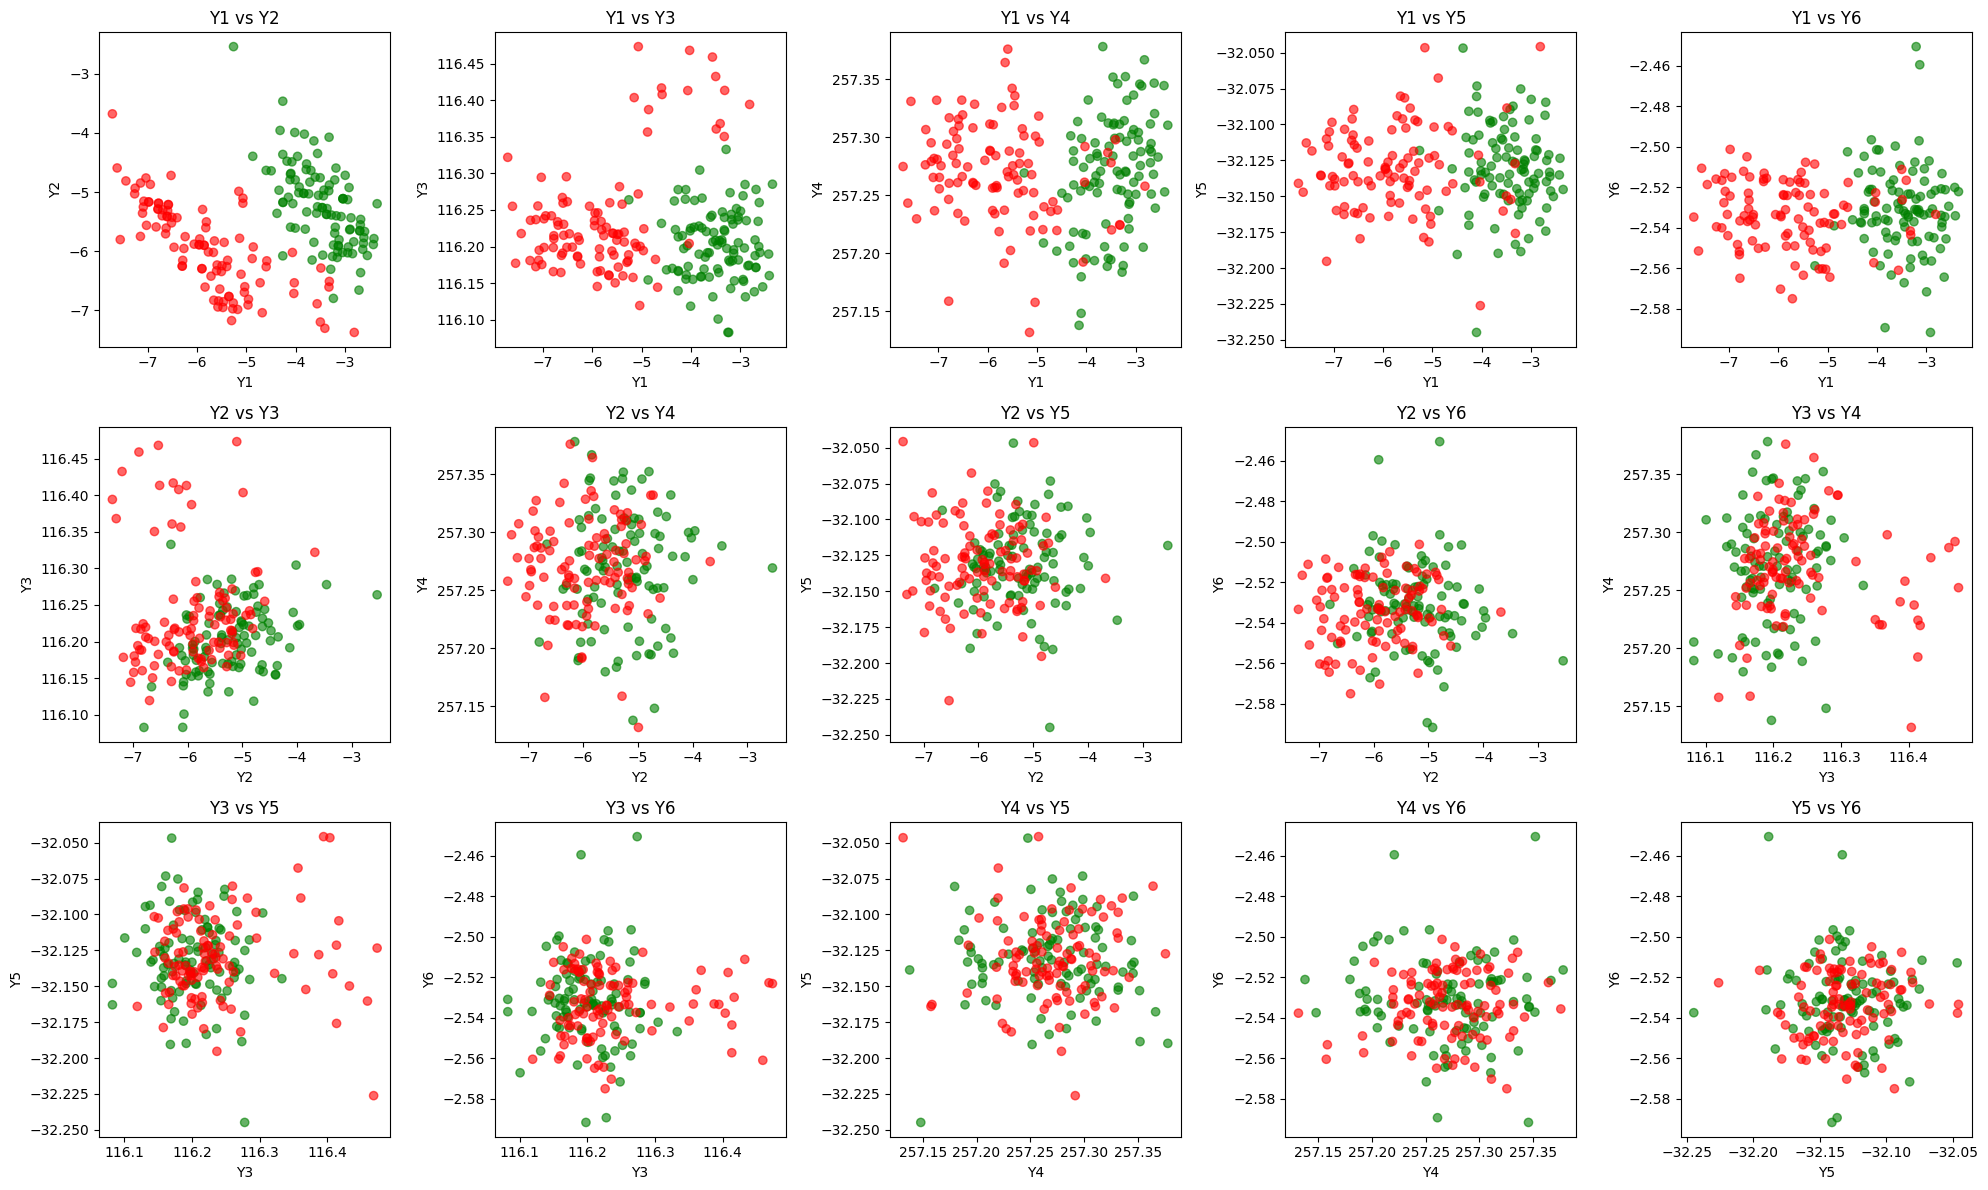

In [ ]:
#Change the scale of the data
banknotes_cm = df.copy()
banknotes_cm[['x1', 'x2', 'x3', 'x6']] = banknotes_cm[['x1', 'x2', 'x3', 'x6']] / 10

#Copy the matrix
X_cm = banknotes_cm.to_numpy()

# Variance and mean
medias_cm = (1/n) * np.dot(unos, X_cm)
H = np.eye(n) - (1/n) * np.dot(unos.T, unos)
print("Medias:\n", medias_cm)

varianza_cm = (1/n) * np.dot(X_cm.T, np.dot(H, X_cm))
print("Matriz de varianza:", varianza_cm)

#Vectors and values
eigenvalues_cm, eigenvectors_cm = np.linalg.eig(varianza_cm)
print("Valores propios:", eigenvalues_cm)
print("Vectores propios:", eigenvectors_cm)


Y_cm = np.dot(X_cm - medias, eigenvectors_cm)


varianza_total_cm = np.sum(eigenvalues_cm)

#Calculate the percentual contribution
aporte_percentual_cm = (eigenvalues_cm / varianza_total_cm) * 100
print("Aporte porcentual:", aporte_percentual_cm)

aporte_cum_cm = np.cumsum(aporte_percentual_cm)
print("Aporte acumulado:", aporte_cum_cm)

#Plor the scatter plot
colors = ['green' if i < 100 else 'red' for i in range(n)]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5),
         (1, 2), (1, 3), (1, 4), (1, 5),
         (2, 3), (2, 4), (2, 5),
         (3, 4), (3, 5),
         (4, 5)]


for i, (comp_x, comp_y) in enumerate(pairs):
    row, col = divmod(i, 5)
    axes[row, col].scatter(Y_cm[:, comp_x], Y_cm[:, comp_y], c=colors, alpha=0.6)
    axes[row, col].set_xlabel(f'Y{comp_x+1}')
    axes[row, col].set_ylabel(f'Y{comp_y+1}')
    axes[row, col].set_title(f'Y{comp_x+1} vs Y{comp_y+1}')

for i in range(len(pairs), 15):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()


#### 1. Effect of Scale Change on Means  

The means of the variables $( X_1 )$, $( X_2 )$, $( X_3 )$, and $( X_6 )$ changed after converting from millimeters to centimeters. The new means were reduced by a factor of 10. However, this does not affect the interpretation of multivariate analysis, as the mean itself does not influence variance or covariance, which are what really matter in PCA.

#### 2. Change in the Variance-Covariance Matrix  

The variance-covariance matrix reflects how data is dispersed around the means of the variables. By converting units from millimeters to centimeters, the variances decrease by a factor of $ 10^2 $, since variance is sensitive to scale changes. In general, if a variable is multiplied by a constant $ c $, its variance is multiplied by $ c^2 $. Thus, by converting from millimeters to centimeters (dividing by 10), the variance of the variables is reduced by a factor of $ 10^2 = 100 $.

**Before Conversion**:
$$
\text{Variance of } X_1 = 0.141084, \quad \text{Variance of } X_6 = 1.3211
$$

**After Conversion**:
$$
\text{Variance of } X_1 = 0.00141084, \quad \text{Variance of } X_6 = 0.01321077
$$

This scale change affects the magnitude of variance but not the relationships between variables. That is, although variances and covariances decrease in magnitude, their proportions remain the same, preserving the data structure.

#### 3. Impact on Eigenvalues  

Eigenvalues reflect the amount of variance explained by each principal component. Since variable variance decreases when changing the scale, eigenvalues also decrease proportionally. However, the **percentage of explained variance** remains almost identical.

**Before Conversion**:
$$
\text{Eigenvalues} = [2.9853, 0.9309, 0.2422, 0.1937, 0.0848, 0.0353]
$$

**After Conversion**:
$$
\text{Eigenvalues} = [2.1013, 0.6263, 0.0047, 0.0021, 0.0009, 0.0004]
$$

Although the eigenvalues themselves have decreased, what really matters are the percentages of explained variance. The explained variance percentages for the first two principal components remain practically the same after conversion:

- **Before**: The first component explained **66.75%** of the variance, and the second component **20.82%**.  
- **After**: The first component explains **76.81%** of the variance, and the second component **22.89%**.  

This demonstrates that **changing the scale of variables does not affect the overall structure of the data**, only the magnitude of the eigenvalues.

#### 4. Percentage and Cumulative Contributions  

The percentage and cumulative contributions are barely affected by the scale change. This is because, while the magnitude of eigenvalues has changed, the **proportion** of variance explained by each principal component remains the same.

- **Cumulative contribution before conversion**:  
  - First component: 66.75%  
  - First and second components: 87.57%  

- **Cumulative contribution after conversion**:  
  - First component: 76.81%  
  - First and second components: 99.71%  

With this scale change, the first two components become significantly more important, making all others negligible.

#### 5. Impact on Scatter Plots  

Scatter plots of principal components before and after conversion show very similar patterns. This is because, while magnitudes have changed, the **orientation** of the principal components (represented by eigenvectors) has not changed significantly. This means that the differentiation between genuine and counterfeit banknotes is still captured similarly, regardless of the variable scale.

The change in units (from millimeters to centimeters) affects the magnitude of variances and eigenvalues but does not change the underlying structure of the data. The proportions of explained variance and relationships between original variables remain nearly identical, ensuring that PCA results are comparable before and after conversion. This demonstrates that **PCA is insensitive to variable scale in terms of structure but sensitive to variance magnitude**.


## Section 3 a)  

Explain why the standardized data is given by:

$$
X_e = H X D^{-1/2}
$$

where $ D $ is the diagonal matrix containing the variances of the original variables along the diagonal:

$$
D = \text{diag}(\sigma_{11}, \sigma_{22}, \dots, \sigma_{pp})
$$


1. **Data Centering**:  
   Before standardizing the data, the first step is centering the variables, which means subtracting the mean of each variable from its observations. The purpose of this step is to ensure that each variable has a mean of zero. This is achieved by multiplying the data matrix $ X $ by the centering matrix $ H $, which is defined as:

   $$
   H = I - \frac{1}{n} \mathbf{1}_n \mathbf{1}_n^T
   $$

   where $ I $ is the identity matrix and $ \mathbf{1}_n $ is a column vector of ones of length $ n $. Applying $ H $ removes the means from the variables, producing centered data.

2. **Variable Normalization**:  
   After centering the data, the next step is to normalize the variables. Normalization ensures that all variables have the same variance. This is important because some variables may have different scales and could disproportionately influence multivariate analyses, such as PCA. Normalization is done by dividing each variable by its standard deviation, which is the square root of its variance.

   The matrix $ D $ is a diagonal matrix where the elements $ \sigma_{ii} $ are the variances of the variables. Thus, $ D^{-1/2} $ contains on its diagonal the inverses of the standard deviations $ 1 / \sqrt{\sigma_{ii}} $, and multiplying by $ D^{-1/2} $ scales each variable in $ X $ by its standard deviation.

3. **Final Standardization**:  
   The result of this operation is the matrix $ X_e $, which contains the standardized data. That is, each variable has a mean of zero (due to $ H $) and unit variance (due to $ D^{-1/2} $). This is crucial to eliminate differences in scale between variables, allowing for a fairer and more equitable analysis in techniques such as Principal Component Analysis (PCA), where varying scales of variables can significantly impact results.

Standardization is key in multivariate data analysis because it ensures that all variables contribute equally to the analysis. By applying $ H $ and $ D^{-1/2} $, variables are centered and normalized, preventing differences in scale from disproportionately affecting the results.


## Section 3 b)  

Note that $ \bar{x}_e = 0 $ and $ S_e = R $, where:

1. **$ \bar{x}_e = 0 $**:  
   When standardizing the data, each variable is centered by subtracting its original mean. This ensures that the mean of each variable in the standardized data is zero. Therefore, $ \bar{x}_e = 0 $.  

2. **$ S_e = R $**:  
   After standardizing the variables, each one has a unit variance. The covariance matrix $ S_e $ for the standardized data is, by definition, a correlation matrix $ R $. This is because, in standardized data, the covariance between standardized variables equals their correlation, as correlation is simply the covariance normalized by the standard deviations of the variables.



## Section 3 c)  

Perform the same procedure as in point (1), but using the normalized principal components (NPC), and conclude.


Medias normalizadas:
 [[ 3.59690056e-14 -7.38298311e-14 -1.34359190e-14 -2.32036612e-16
   1.01696429e-15  6.54587495e-15]]
Matriz de varianza de los datos normalizados:
 [[ 200.           46.25851392   30.3525595   -37.96018465  -12.26428284
    38.86029168]
 [  46.25851392  200.          148.65255328   82.75619527   72.46991977
  -100.64580901]
 [  30.3525595   148.65255328  200.           97.3515306    80.13404284
  -103.29510828]
 [ -37.96018465   82.75619527   97.3515306   200.           28.37026895
  -124.59653934]
 [ -12.26428284   72.46991977   80.13404284   28.37026895  200.
  -118.80892862]
 [  38.86029168 -100.64580901 -103.29510828 -124.59653934 -118.80892862
   200.        ]]
Valores propios de los datos normalizados:
 [589.11164078 255.61675562 173.80651027  89.95373593  53.73538083
  37.77597657]
Vectores propios de los datos normalizados:
 [[ 0.00698703  0.81549497  0.01768066 -0.57461728  0.0587961  -0.03105698]
 [-0.46775816  0.34196711 -0.10338286  0.39492254 -0.6394

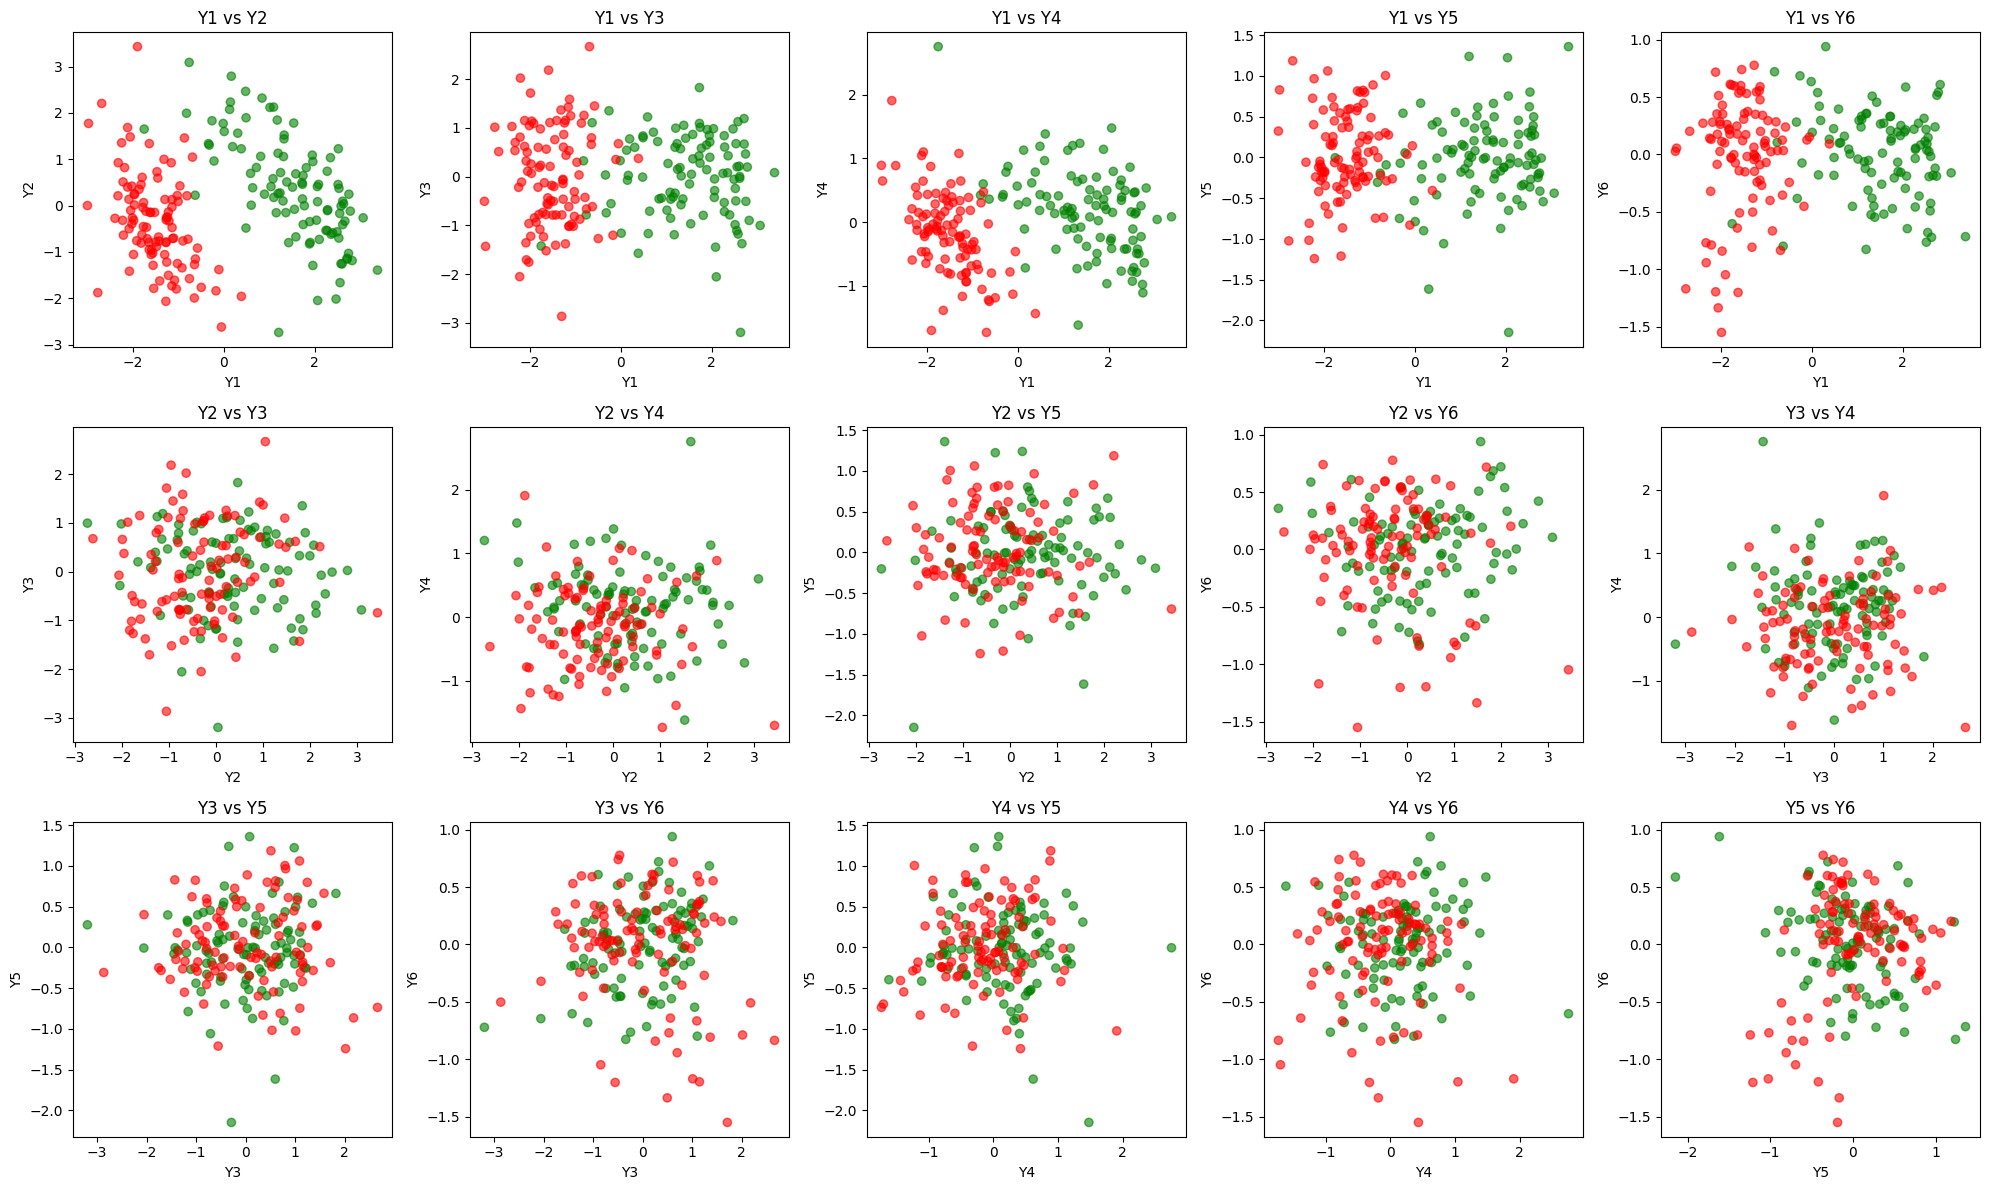

In [ ]:
# Calculate the means and standard deviations of each variable
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)

# Normalize the data: X_normalized = (X - mean) / standard deviation
X_normalizado = (X - mean_X) / std_X

# Calculate the means of the normalized data
medias_normalizadas = (1/n) * np.dot(unos, X_normalizado)
print("Normalized means:\n", medias_normalizadas)

# Compute the variance-covariance matrix of the normalized data
varianza_normalizada = np.dot(X_normalizado.T, np.dot(H, X_normalizado))
print("Variance matrix of the normalized data:\n", varianza_normalizada)

# Compute the eigenvalues and eigenvectors of the normalized variance matrix
eigenvalues_norm, eigenvectors_norm = np.linalg.eig(varianza_normalizada)
print("Eigenvalues of the normalized data:\n", eigenvalues_norm)
print("Eigenvectors of the normalized data:\n", eigenvectors_norm)

# Compute the normalized principal components
Y_normalizado = np.dot(X_normalizado, eigenvectors_norm)
print("Normalized principal components Y:\n", Y_normalizado)

# Compute the percentage and cumulative contributions with the normalized data
varianza_total_normalizada = np.sum(eigenvalues_norm)
aporte_percentual_norm = (eigenvalues_norm / varianza_total_normalizada) * 100
aporte_acumulado_norm = np.cumsum(aporte_percentual_norm)

print("Percentage contribution of each principal component (normalized):\n", aporte_percentual_norm)
print("Cumulative contribution (normalized):\n", aporte_acumulado_norm)

# Plot scatter plots of the normalized principal components
colors = ['green' if i < 100 else 'red' for i in range(n)]  # Assume the first 100 are genuine, the rest are fake

# Create subplots
fig, axes = plt.subplots(3, 5, figsize=(20, 12))

# List of component pairs to plot
pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5),
         (1, 2), (1, 3), (1, 4), (1, 5),
         (2, 3), (2, 4), (2, 5),
         (3, 4), (3, 5),
         (4, 5)]

# Plot each pair of principal components
for i, (comp_x, comp_y) in enumerate(pairs):
    row, col = divmod(i, 5)
    axes[row, col].scatter(Y_normalizado[:, comp_x], Y_normalizado[:, comp_y], c=colors, alpha=0.6)
    axes[row, col].set_xlabel(f'Y{comp_x+1}')
    axes[row, col].set_ylabel(f'Y{comp_y+1}')
    axes[row, col].set_title(f'Y{comp_x+1} vs Y{comp_y+1}')

plt.tight_layout()
plt.show()


#### Interpretation of Results After Normalization

#### 1. **Normalized Means**
   - After normalization, the means of all variables tend to zero. This is expected because normalization involves centering the data by subtracting the mean of each variable.

   $$
   \text{Normalized means} \approx [0, 0, 0, 0, 0, 0]
   $$

   This means that the reference point for all variables has been shifted to the origin of the coordinate system.

#### 2. **Normalized Variance-Covariance Matrix**
   - The variance-covariance matrix of the normalized data is equivalent to the correlation matrix. Since all variables now have unit variance \( 1 \), the variance matrix itself becomes a correlation matrix:

   $$
   \text{Normalized variance} = \text{Correlation matrix}
   $$

   This ensures that all variables have the same influence on the analysis, eliminating the impact of their original scales.

#### 3. **Eigenvalues and Eigenvectors**
   - The eigenvalues of the normalized data represent the amount of variance explained by each principal component. The key difference from the unnormalized analysis or the data converted to centimeters is that the **eigenvalues** are now more balanced. This reflects how normalization has equalized the scales between variables.

   **Eigenvalues of normalized data**:
   $$
   [589.11164078, 255.61675562, 173.80651027,  89.95373593,  53.73538083, 37.77597657]
   $$

   **Eigenvalues of unnormalized data**:
   $$
   [2.9853, 0.9309, 0.2422, 0.1937, 0.0848, 0.0353]
   $$

   **Eigenvalues in cm**:
   $$
   [2.1013, 0.6263, 0.0047, 0.0021, 0.0009, 0.0004]
   $$

   Although the eigenvalues differ in magnitude due to different scaling approaches, the general pattern remains consistent: the first eigenvalue is significantly larger, meaning that the first principal component still explains most of the variance.

#### 4. **Percentage and Cumulative Contributions**
   - After normalization, the first two principal components still explain most of the variance. This is consistent with previous results, but the distribution of contributions is more balanced due to normalization.

   **Percentage contributions with normalized data**:
   $$
   [49.09\%, 21.30\%, 14.48\%, 7.49\%, 4.47\%, 3.14\%]
   $$

   **Percentage contributions with unnormalized data**:
   $$
   [66.75\%, 20.82\%, 5.42\%, 4.33\%, 1.90\%, 0.79\%]
   $$

   **Percentage contributions with data in cm**:
   $$
   [76.81\%, 22.89\%, 0.17\%, 0.08\%, 0.03\%, 0.01\%]
   $$

   This shows that normalization not only centers the data but also balances the scales, allowing the first principal components to explain variance in a more evenly distributed manner.

#### 5. **Scatter Plots of Principal Components**
   - The scatter plots clearly separate genuine and counterfeit banknotes, both in the normalized and centimeter-scaled data. The main difference with unnormalized data is that, in those cases, dispersion is more influenced by the original variable scales.
   
   - In normalized data, since all variables have the same scale, the principal components display a clearer and more balanced separation between the two groups of banknotes.

### Comparison of Results:

1. **Unnormalized Data**:
   - Variables with larger scales (such as length and diagonal) dominate the first principal components, biasing the results toward those variables.

2. **Data Converted to Centimeters**:
   - Changing the units affected the magnitude of variances but maintained the same data structure. This reflects differences in variance across variables.

3. **Normalized Data**:
   - Normalization fully balances the scales and variances, resulting in a more balanced analysis where all variables contribute equally to the principal components. This is the preferred approach when variables have different units or widely varying scales, making it ideal for multivariate analyses like PCA.
